<a href="https://colab.research.google.com/github/DarShabi/OCR-Company-Project/blob/main/Week%231/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
import json
from collections import Counter, defaultdict
import re
import matplotlib.image as mpimg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_folder = "/content/drive/MyDrive/Data/Data_samples"

# EDA Functions

In [4]:
def load_images_and_annotations_from_folders(root_folder):
    """
    Loads all images and corresponding JSON annotations from subfolders.

    Parameters:
    root_folder (str): Path to the root folder.

    Returns:
    list, list: A list of paths to the images and a list of corresponding annotations (dictionaries).
    """
    img_paths = []
    texts = []
    # Iterate through all subdirectories
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            # Process only .jpg files that do not contain 'thumb' in their names
            if file.endswith('.jpg') and 'thumb' not in file:
                img_path = os.path.join(subdir, file)
                # Construct corresponding .analysis.json file path
                json_path = os.path.splitext(img_path)[0] + '.analysis.json'
                # Check if corresponding .analysis.json file exists
                if os.path.isfile(json_path):
                    img_paths.append(img_path)
                    with open(json_path, 'r') as json_file:
                        annotation = json.load(json_file)
                        texts.append(annotation)
                else:
                    print(f"file {img_path} does not have corresponding .analysis.json file.")
    return img_paths, texts

In [5]:
def image_properties(img_paths):
    """
    Analyze and plot the properties of images: width, height, mode (color scale)

    Parameters:
    img_paths (list): A list of paths to the images.

    """
    widths = []
    heights = []
    modes = []

    for path in img_paths:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            modes.append(img.mode)

    # Plotting
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.hist(widths, bins=20)
    plt.title('Image Widths')

    plt.subplot(1, 3, 2)
    plt.hist(heights, bins=20)
    plt.title('Image Heights')

    plt.subplot(1, 3, 3)
    plt.hist(modes, bins=20)
    plt.title('Image Modes')

    plt.tight_layout()
    plt.show()


In [6]:
def image_quality(img_paths):
    """
    Analyze and plot the average pixel intensity (brightness) of images

    Parameters:
    img_paths (list): A list of paths to the images.

    """
    avg_intensities = []

    for path in img_paths:
        with Image.open(path) as img:
            img_gray = img.convert("L")  # convert image to grayscale
            avg_intensity = np.array(img_gray).mean()
            avg_intensities.append(avg_intensity)

    plt.hist(avg_intensities, bins=20)
    plt.title('Image Average Intensity')
    plt.xlabel('Average Intensity')
    plt.ylabel('Frequency')
    plt.show()


In [7]:
def text_length_distribution(texts):
    """
    Analyze and plot the length distribution of texts

    Parameters:
    texts (list): A list of texts.

    """
    lengths = [len(text['text']) for text in texts]

    pd.Series(lengths).hist(bins=20)
    plt.title('Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()


In [8]:
def explore_unique_fields(texts):
    """
    Explore all available fields in the .anlysis.json files
    Parameters:
    texts (list): list of the annotation (dictionaries).

    Returns:
    fields_counts (collections.defaultdict object): unique fields and their counts.
    """
    fields_counts = defaultdict(int)

    # Function to flatten nested dictionaries
    def flatten(d, parent_key='', sep='_'):
        items = {}
        for k, v in d.items():
            new_key = parent_key + sep + k if parent_key else k
            if isinstance(v, dict):
                items.update(flatten(v, new_key, sep=sep))
            else:
                items[new_key] = v
        return items

    # Iterate through texts and process each text
    for text in texts:
        flat_annotation = flatten(text)
        for field in flat_annotation:
            fields_counts[field] += 1

    return fields_counts


In [9]:
def find_images_without_json(root_folder):
    """
    Find images in the given root directory that do not have corresponding .analysis.json files.

    Parameters:
    root_folder (str): Path to the root folder containing subdirectories with images and JSON files.

    Returns:
    int: The count of images without corresponding .analysis.json files.
    list: A list containing the paths of images without corresponding .analysis.json files.
    """
    missing_json_images = []

    # Iterate through all subdirectories
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            # Process only .jpg files that do not contain 'thumb' in their names
            if file.endswith('.jpg') and 'thumb' not in file:
                img_path = os.path.join(subdir, file)
                json_path = img_path[:-4] + '.analysis.json'
                # Check if corresponding .analysis.json file does not exist
                if not os.path.isfile(json_path):
                    missing_json_images.append(img_path)

    # Display images
    for idx, img_path in enumerate(missing_json_images):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Image {idx + 1}")
        plt.axis('off')
        plt.show()

    return len(missing_json_images), missing_json_images


In [23]:
def plot_image_properties_vs_text(img_paths, texts):
    heights = []
    widths = []
    modes = []
    text_lengths = []

    for img_path, annotation in zip(img_paths, texts):
        with Image.open(img_path) as img:
            width, height = img.size
            modes.append(img.mode)
            widths.append(width)
            heights.append(height)
            text_lengths.append(len(annotation['text']))

    # Scatter plot Height vs Text Length
    plt.scatter(heights, text_lengths)
    plt.title('Height vs Text Length')
    plt.xlabel('Height')
    plt.ylabel('Text Length')
    plt.show()

    # Scatter plot Width vs Text Length
    plt.scatter(widths, text_lengths)
    plt.title('Width vs Text Length')
    plt.xlabel('Width')
    plt.ylabel('Text Length')
    plt.show()

    # Scatter plot Mode vs Text Length
    plt.scatter(modes, text_lengths)
    plt.title('Mode vs Text Length')
    plt.xlabel('Mode')
    plt.ylabel('Text Length')
    plt.show()


In [30]:
# TO DO: Display some images that correspond to the extra long annotations (instead of printing all of the abnormal annotations).
# TO DO: Display some images that correspond to the abnormal shapes (instead of printing all of the the paths/shapes).

def find_anomalies(img_paths, texts, text_length_threshold=1000, width_threshold=5000, height_threshold=3000):
    anomalous_texts = [text for text in texts if len(text['text']) > text_length_threshold]
    anomalous_images = []

    for path in img_paths:
        with Image.open(path) as img:
            width, height = img.size
            if width > width_threshold or height > height_threshold:
                anomalous_images.append((path, width, height))

    print("Texts with length over", text_length_threshold)
    for text in anomalous_texts:
        print(text['text'])
        print("-----------------------------------------------------------------")

    print("Images with width over", width_threshold, "or height over", height_threshold)
    for img_info in anomalous_images:
        print("Path:", img_info[0], "Width:", img_info[1], "Height:", img_info[2])

    return anomalous_texts, anomalous_images


# Executing

In [10]:
# Load images and annotations
img_paths, texts = load_images_and_annotations_from_folders(root_folder)

file /content/drive/MyDrive/Data/Data_samples/forum_forumkorner/1723061f0c317f2faa27f9193bb70e9d (1).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_forumkorner/1fac3bae0a135b4ef68b3fc32a8c0404 (1).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_forumkorner/37e9a9fca564bd196adff802f739ec81 (1).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_cssforum/0158efb0a1beb8cb37b1064fdb8d899c (2).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_cssforum/0158efb0a1beb8cb37b1064fdb8d899c (1).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_cssforum/01e9cf7428895ddd0d5a7d4c4fa9ba73 (2).jpg does not have corresponding .analysis.json file.
file /content/drive/MyDrive/Data/Data_samples/forum_cssforum/01e9cf7428895ddd0d5a7d4c

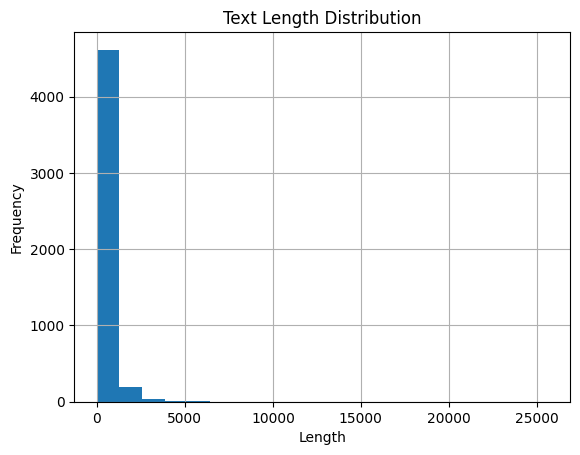

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


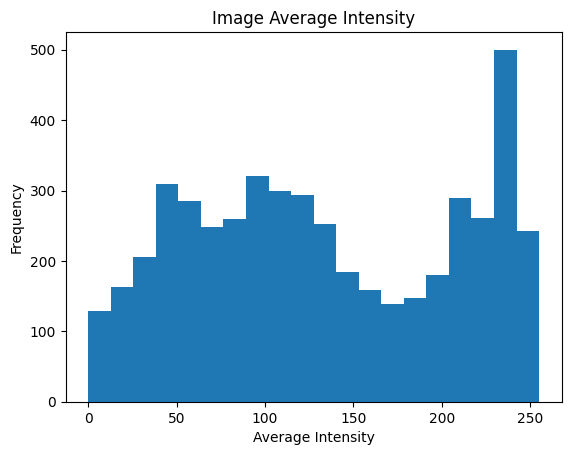

In [11]:
# Execute EDA functions
image_properties(img_paths)
text_length_distribution(texts)
image_quality(img_paths)

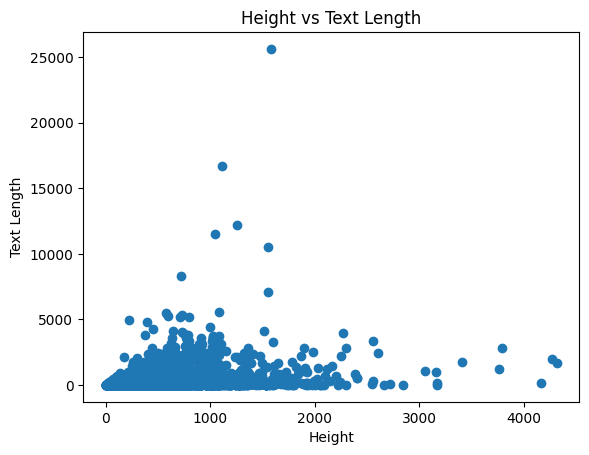

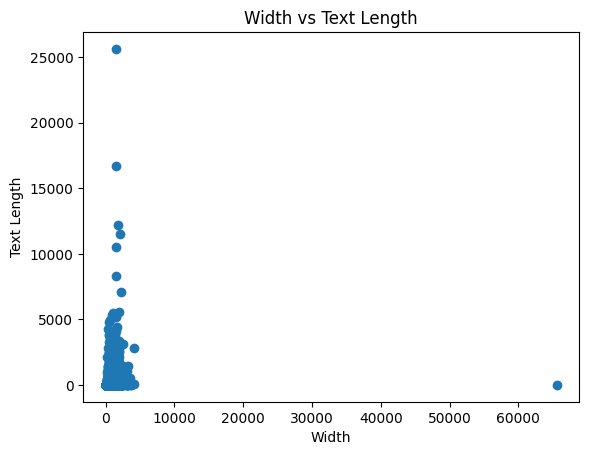

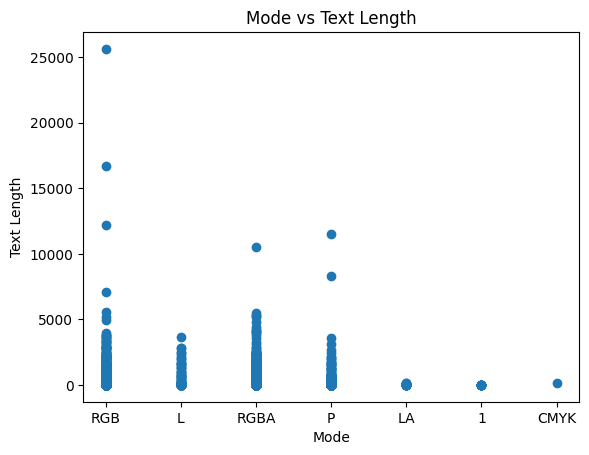

In [24]:
plot_image_properties_vs_text(img_paths, texts)

In [12]:
type(texts[0])

dict

In [13]:
print(texts[0])

{'ocr_text_info': {'all_text': 'Aloha\nW LEREEE\n3imL.\nT19\nucket\nAIR CALIFORNIA\nS storeshare.\nexgu\nLana\nBXS\noptegraPIS\nGrod\nnates\n', 'is_arabic': False}, 'safe_search': {'medical': 1, 'spoof': 1, 'violence': 1, 'adult': 1}, 'size': {'width': 1024, 'height': 744}, 'text': 'Aloha\nW LEREEE\n3imL.\nT19\nucket\nAIR CALIFORNIA\nS storeshare.\nexgu\nLana\nBXS\noptegraPIS\nGrod\nnates\n', 'is_emoji': False}


In [14]:
fields_counts = explore_unique_fields(texts)
for field, count in fields_counts.items():
    print(f"Field: {field} ----- Count: {count}")

Field: ocr_text_info_all_text ----- Count: 2110
Field: ocr_text_info_is_arabic ----- Count: 2524
Field: safe_search_medical ----- Count: 4868
Field: safe_search_spoof ----- Count: 4868
Field: safe_search_violence ----- Count: 4868
Field: safe_search_adult ----- Count: 4868
Field: size_width ----- Count: 4859
Field: size_height ----- Count: 4859
Field: text ----- Count: 4868
Field: is_emoji ----- Count: 2817


In [15]:
print(f"Image count: {len(img_paths)}")
print(f"Texts count: {len(texts)}")

Image count: 4868
Texts count: 4868


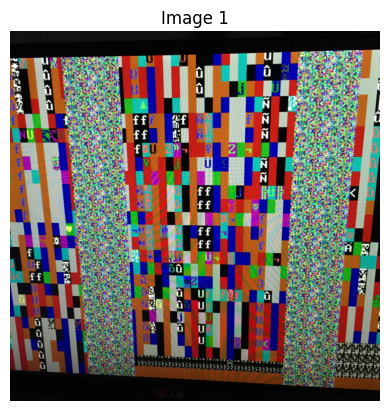

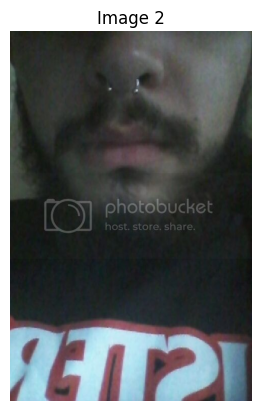

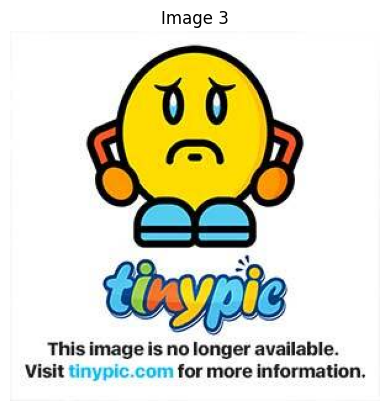

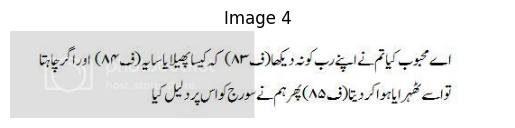

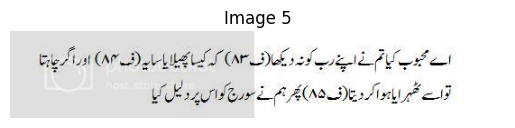

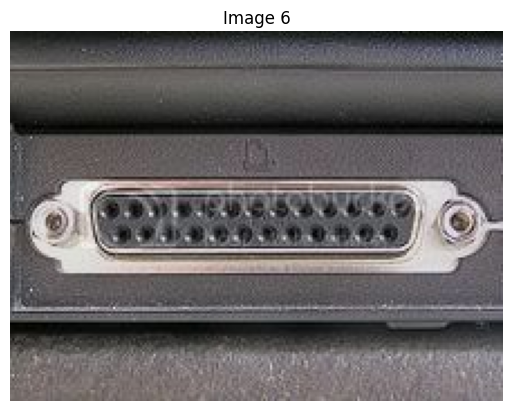

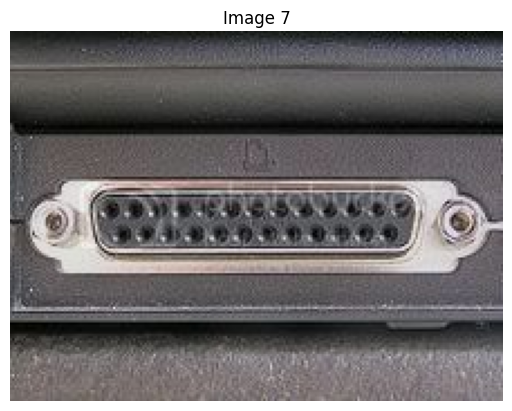

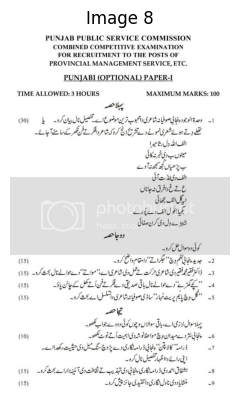

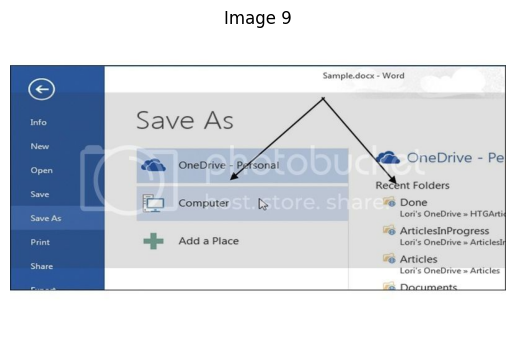

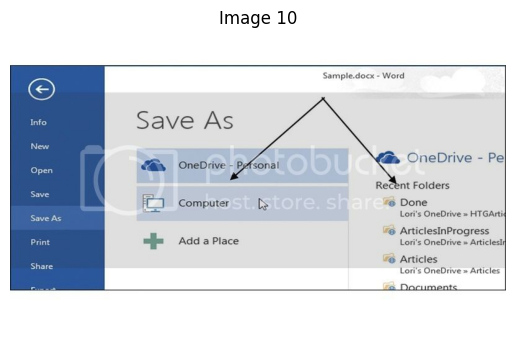

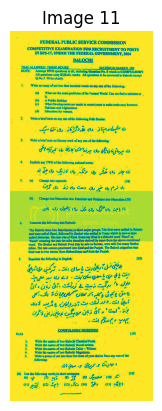

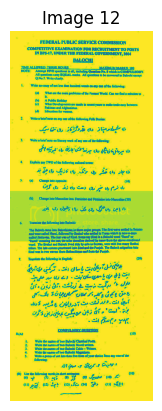

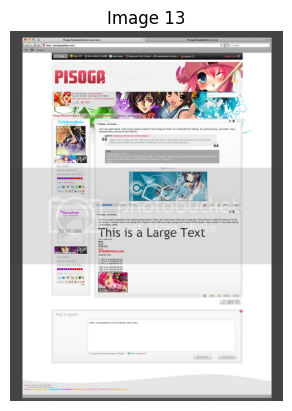

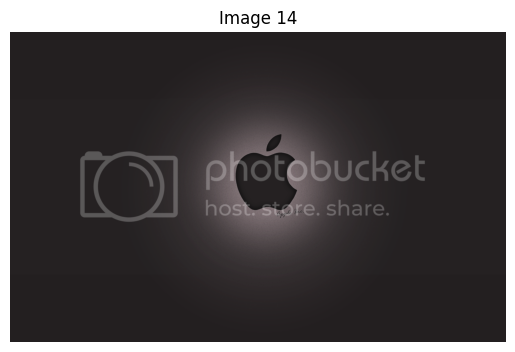

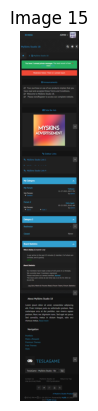

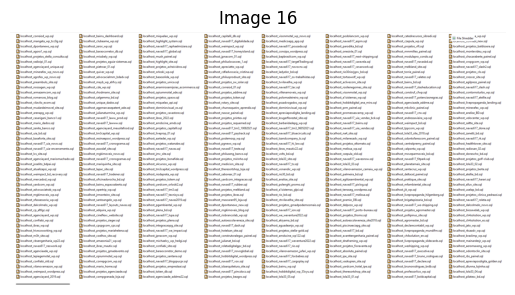

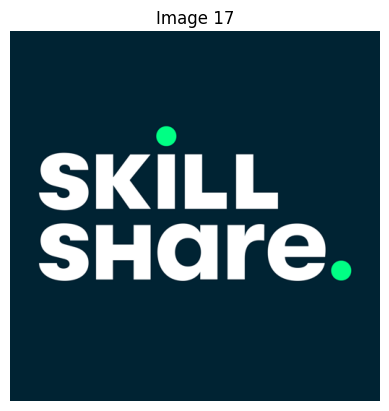

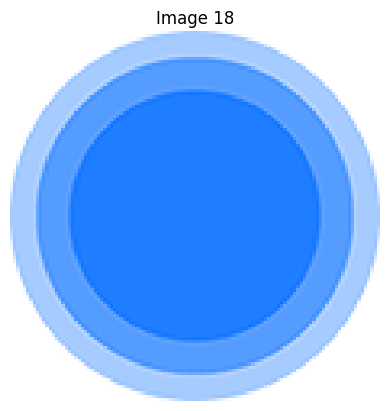

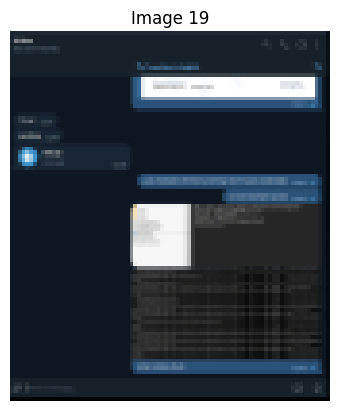

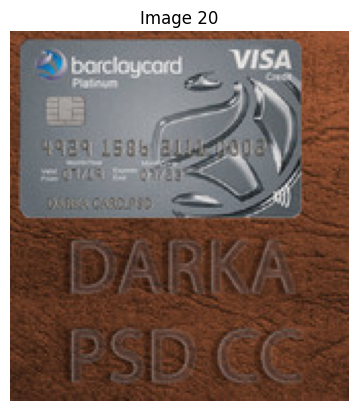

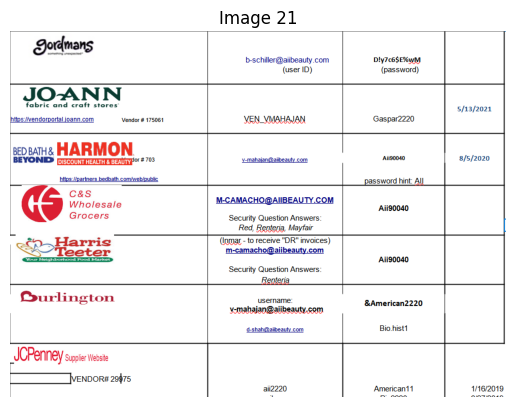

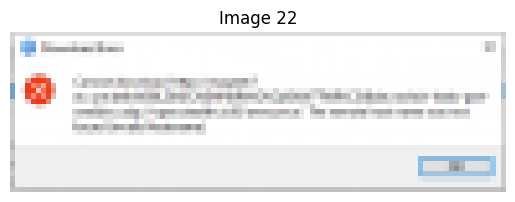

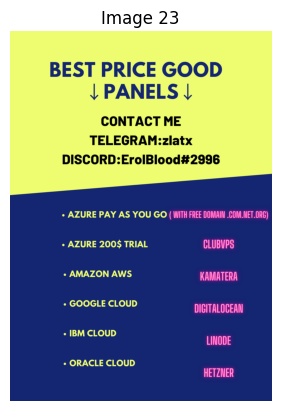

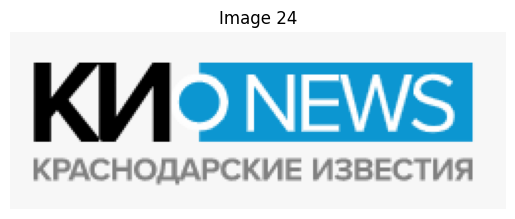

(24,
 ['/content/drive/MyDrive/Data/Data_samples/forum_forumkorner/1723061f0c317f2faa27f9193bb70e9d (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_forumkorner/1fac3bae0a135b4ef68b3fc32a8c0404 (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_forumkorner/37e9a9fca564bd196adff802f739ec81 (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/0158efb0a1beb8cb37b1064fdb8d899c (2).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/0158efb0a1beb8cb37b1064fdb8d899c (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/01e9cf7428895ddd0d5a7d4c4fa9ba73 (2).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/01e9cf7428895ddd0d5a7d4c4fa9ba73 (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/01f2879ce9645ec7f57bfcc53e91c3b8 (1).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/025bd48880e71f48c0fe791e3f28395c (2).jpg',
  '/content/drive/MyDrive/Data/Data_samples/forum_cssforum/025bd4888

In [16]:
find_images_without_json(root_folder=root_folder)

In [29]:
find_anomalies(img_paths, texts)

Streaming output truncated to the last 5000 lines.
сервиса 5-7%
Минимальная сумма
обмена от 1000$
Реферальная программа и скидки
Приведи друга и получай
постоянный процент с его обменов
В
Получи скидку при добавлении
отзыва на любой из форумов
Принимаем монеты
с любым АML
-------------------------------
21:11 A
4G+
83
Bizzy
Give*
thanks and take
Nothing
online
for Granted
that's the only amount i can afford to loose if your
stuff ain't quality enough
21:09
Lol, regardless i met up to the standard of what
was required and you refusing to send payments
21:09 /
bro stop saying all this! 21:09
your money is safe with me 21:09
Bizzy
that's the only amount i can afford to loose if y.
Lol, not quality after you done uploading and shit?
21:09
i told you imma test spam with this pagethen pay
21:10
o 脚
PRESE
Bizzy
START
I your money is safe with me
IDC Man, if it ain't with me... Ain't safe with
nobody Lol
21:10 /
Bizzy
i told you imma test spam with this pagethen...
Tot
Nah, you said an hour an

([{'ocr_text_info': {'all_text': 'WARBIRDS SERIES\nDRAGON\nThe Avea Wcan played an ipotani le s stalg bonter Fon 1969 0 14 For more hen 30 years dong he begh Be Cold Wa\ntrat amedwth nuder bonbs wasmady la deler feegn natons such es be Soviel Uhon fom aacing Great Brtein Operaled by he Voonber\ncoss-section made Edes for penetrating eny arigace le delver ts noclear paoed should the need bave aen Alots of 134 Vcas wert\nmanuadured, with econd tranche kiown a he 2 being he mod comon Aloal of4581 and 82 arct were produced up 15\nThe 82 featured larger and thinner wngs hlea geter fuel capecity ofered a ousng\nelectonics and rada This indudes, bo he nid 1s onrds teinolovng radane nodecne ad a pasve reder waning syslen ie he\ntn Late e . he Aro Mcan wi d for conertional bombing mons ost sotcesly apnt Argentira darng he Falands Var of 192\nFar tvee decades the Wiean ployed an nponant le in he Cold Wir before ws ventualy sigerseded by he Tanad\neof TAn. Eaise hed eproved equpmeni such as\n1:20